# Toxicity Classifier
## Bag Of Words

We built a simple text classifier to predict whether a sentence has toxicity or not. Bag of words is a count-based model after building the vector will use a linear regression model to classify.
We will use Jigsaw Wikipedia Toxic Comment dataset (https://paperswithcode.com/dataset/toxic-comment-classification-challenge)


In [1]:
!git clone "https://github.com/nishithsharma9/ToxicityRemoval.git"

Cloning into 'ToxicityRemoval'...
remote: Enumerating objects: 99, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 99 (delta 0), reused 8 (delta 0), pack-reused 87
Unpacking objects: 100% (99/99), done.
Checking out files: 100% (65/65), done.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Preprocess and load the data

Here, we will load the data and preprocess it. We will extract features from our data and transform the features into vector (or matrix) form.

In [3]:
def preprocess_text(text):
    """
    Function that preprocesses the string
    """
    preprocessed_text = text.lower().replace("<br />", "")
    return preprocessed_text
        
    
def read_file(file_name, label):
    """
    Function that reads a file 
    and return the raw text, preprocessed text, and label
    """
    with open(file_name, "r") as f:
        raw_text = f.read()
        preprocessed_text = preprocess_text(raw_text)
    return raw_text, preprocessed_text, label

def construct_dataset(dataset_dir):
    """
    Function that loads a dataset
    @param offset: skip first offset items in this dir
    """
    pos_dir = os.path.join(dataset_dir, "pos")
    neg_dir = os.path.join(dataset_dir, "neg")
    dir_list = [neg_dir, pos_dir]
    raw_contents, contents, labels = [], [], []
    all_pos = os.listdir(pos_dir)
    all_neg = os.listdir(neg_dir)
    data_size = len(all_neg)
    for i in range(data_size):
        for lbl, dataset in enumerate([all_neg, all_pos]):
          raw_content, content, label = read_file(os.path.join(dir_list[lbl], dataset[i]), lbl)
          contents.append(content)
          raw_contents.append(raw_content)
          labels.append(label)

    return raw_contents, contents, labels

In [4]:
sentiments = ["NonToxic", "Toxic"]

We will split the data into test and training and use the testing later for hyperparameter tuning and model selection stage. 
Let's split the given train data into training set and validation set.

In [5]:
from sklearn.model_selection import train_test_split
data = pd.read_csv("/content/ToxicityRemoval/Data/ToxicTextClassifierData/train.csv")

train_data, test_data = train_test_split(data, test_size=0.4)
test_data, val_data = train_test_split(test_data, test_size=0.5)

train_contents = list(train_data.comment_text)
train_labels = list(train_data['toxic'] | train_data['severe_toxic'] | train_data['obscene'] | train_data['threat'] |train_data['insult']|train_data['identity_hate'])

test_contents = list(test_data.comment_text)
test_labels = list(test_data['toxic'] | test_data['severe_toxic'] | test_data['obscene'] | test_data['threat'] |test_data['insult']|test_data['identity_hate'])

val_contents = list(val_data.comment_text)
val_labels = list(val_data['toxic'] | val_data['severe_toxic'] | val_data['obscene'] | val_data['threat'] |val_data['insult'] | val_data['identity_hate'])

In [6]:
# Size check on the dataset
print(f"Train size: {len(train_contents)}, "
      f"\nVal size: {len(val_contents)}, "
      f"\nTest size: {len(test_contents)}")

Train size: 95742, 
Val size: 31915, 
Test size: 31914


In [7]:
print("Text: ", train_contents[0])
print("classification: ", sentiments[train_labels[0]])

Text:  Because that's just the opening paragraph. The whole thing is shocking. Please propose radical changes here before you make them.
classification:  NonToxic


# Bag of words
Our training data is in text format, but for feeding it as input to a machine learning model, we need to transform the text into numbers.

To do this is to represent each example in the data as a vector of word counts.

For example:  
X = ['NLP is fun', 'NYU is fun'] 

features = ['NLP', 'is', 'fun', 'NYU']  

Vectorized_X:  
[ [1 1 1 0]   
  [0 1 1 1 ]  ]



Using `sklearn.feature_extraction.text.CountVectorizer`, we will construct a `CountVectorizer` class that extract features from training data using the most frequent words in the training data.

We will then transform the text data into BoW vector representations using the `transform` function of the `CountVectorizer` --- each row of the input matrix (vector) corresponds to an example in the dataset, each column corresponds to a word, and each entry corresponds to the number of times that word appears in the corresponding example.


In [8]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# TODO: YOUR CODE HERE
vectorizer = CountVectorizer(max_features=2000)
vectorizer.fit(train_contents)
X_train = vectorizer.transform(train_contents)
X_val = vectorizer.transform(val_contents)
X_test = vectorizer.transform(test_contents)

y_train = np.array(train_labels)
y_val = np.array(val_labels)
y_test = np.array(test_labels)

In [9]:
len(train_contents),len(train_labels)
len(test_contents),len(test_labels)
len(val_contents),len(val_labels)

(31915, 31915)

In [10]:
vocab = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
X_train

<95742x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 3258911 stored elements in Compressed Sparse Row format>

# Logistic Regression

Now, we will train a logistic regression classifier on our data. 


In [12]:
from sklearn.linear_model import LogisticRegression

# Define Logistic Regression model
# TODO: YOUR CODE HERE
model = LogisticRegression()

# Fit the model to training data
# TODO: YOUR CODE HERE
model.fit(X_train, y_train)

# make prediction using the trained model
# TODO: YOUR CODE HERE
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Report the accuracy of the model on training and validation set.  

In [13]:
from sklearn.metrics import f1_score, accuracy_score
# TODO: YOUR CODE HERE
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training accuracy:", train_accuracy)
print("Validation accuracy:", val_accuracy) 

Training accuracy: 0.9553278602911993
Validation accuracy: 0.9507754974150087


Let's check prediction of the model on a random example in validation set.

In [14]:
import random
j = random.randint(0,len(y_val))
print("True label: ", sentiments[y_val[j]])
print("Prediction: " , sentiments[y_val_pred[j]])
print(val_contents[j].strip())

True label:  NonToxic
Prediction:  NonToxic
"

50 Cent/George Bush section

What is your definition of a ""concensus""???  Most of the people who've commented so far hold my position-that if it's factually true (it is) and it's relevant (it certainly is) then it should be added to his article.  Months ago, we came to the same concensus on it and nobody had a problem with it.  It was pretty much the same entry, word for word.  There's already a solid precedent for a ""Political views"" section in articles of entertainers and/or non-politicians. I have also tried to stay as NPOV as humanly possible. The entry is factual and fair and it meets all Wikipedia standards.  (Talk) "


Finally, we can check the coefficients, or learned weights, of each word feature to understand which features are generally associated with positive or negative sentiment.

In [15]:
coefficients = model.coef_[0]
indices = np.argsort(coefficients) 
# Most negatively weighted
print("Words associated with NonToxic sentences:")
for i in indices[:10]:
  print(vocab[i], coefficients[i])
print()
# Most positively weighted
print("Words associated with Toxic sentences")
for i in indices[-10:]: 
  print(vocab[i], coefficients[i])

Words associated with NonToxic sentences:
parents -1.6778150057221606
father -1.2220659719501001
appreciate -1.1935089548235815
redirect -1.1714205589959874
meant -1.1537968783686878
thank -1.1353705392643947
share -1.0936607777990197
mention -1.0768296355148754
fair -1.0768085725086698
disagree -1.007542897081353

Words associated with Toxic sentences
ass 3.7676212256974475
bullshit 3.793723427722277
shit 3.9208744201518138
cunt 4.077167696411222
asshole 4.09461612370586
idiot 4.307115705610079
faggot 4.413701979916664
bitch 4.924959852431103
fucking 5.550470029162348
fuck 6.849694685953936


In [16]:
from wordcloud import WordCloud

positive_word_score_dict = {}
negative_word_score_dict = {}

for i in indices:
    positive_word_score_dict[vocab[i]] = coefficients[i]
    negative_word_score_dict[vocab[i]] = -coefficients[i]

positive_wordcloud = WordCloud(width=500,height=500,scale=10,background_color=None,mode='RGBA').generate_from_frequencies(positive_word_score_dict)
negative_wordcloud = WordCloud(width=500,height=500,scale=10,background_color=None,mode='RGBA').generate_from_frequencies(negative_word_score_dict)

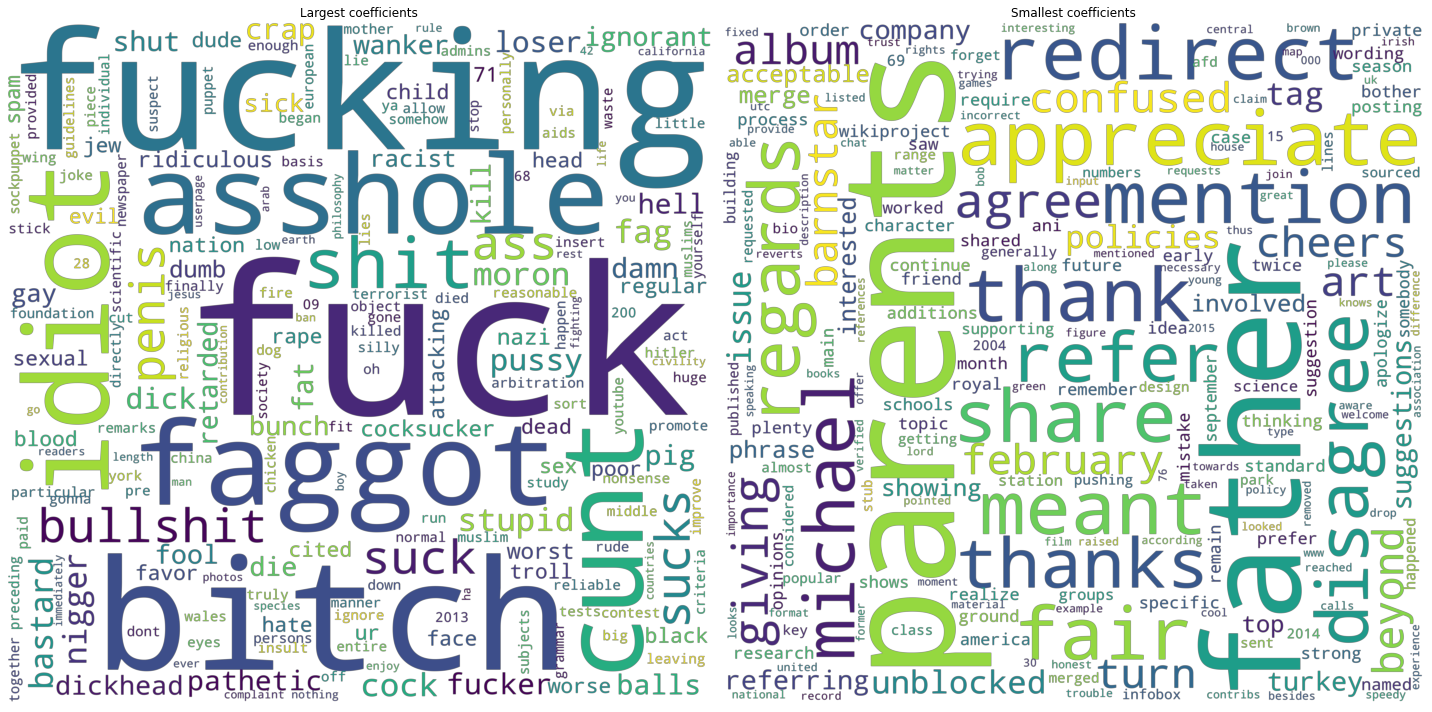

In [17]:
fig, ax = plt.subplots(1,2,figsize=(20, 10))
ax[0].imshow(positive_wordcloud, interpolation='bilinear', aspect='auto')
ax[0].axis('off')
ax[0].set_title('Largest coefficients')
ax[1].imshow(negative_wordcloud, interpolation='bilinear', aspect='auto')
ax[1].axis('off')
ax[1].set_title('Smallest coefficients')

plt.tight_layout()


### How performance depends on size of train data? Learning curve.

Let's explore how train, val performance changes depending on how much data the model uses for training.

Here we train the model on train subsets of different sizes (randomly pick `n` reviews from train), calculate train and val accuracies in each case and plot the results (with train size on x axis, accuracy on y axis) -- there will be two curves, for train and for val. This plot is called Learning curve.

In [18]:
train_sizes = np.arange(1000, len(y_train), 1000)
scores_train = []
scores_val = []

for train_size in train_sizes:
    """
    TODO: YOUR CODE GOES HERE
    """
    inds = np.random.randint(len(y_train), size=train_size)
    X_train_sub = X_train[inds,:]
    y_train_sub = y_train[inds]
    model = LogisticRegression()
    model.fit(X_train_sub , y_train_sub)
    y_train_pred = model.predict(X_train_sub)
    y_val_pred = model.predict(X_val)
    scores_train.append(accuracy_score(y_train_sub, y_train_pred))
    scores_val.append(accuracy_score(y_val, y_val_pred))
    

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


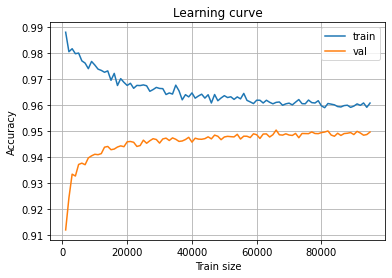

In [19]:
plt.plot(train_sizes, scores_train, label="train")
plt.plot(train_sizes, scores_val, label="val")
plt.title("Learning curve")
plt.xlabel("Train size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# Hyperparameter Tuning & Model Selection
There are hyperparameters -- the model configuration whose value is set before learning process -- associated with each model design. 
For example, in `vectorizer = CountVectorizer(max_features=2000)`, `max_features=2000` is a hyperparameter.

We train the models with different hyperparameters and select the model that has the best validation performance as the best model. And, we report the performance of that best model on the test data as our final test score. 
(You should **never** use test data for hyperparameter tuning and model selection).

Now, try tuning the hyperparameters of the model using validation set and report the test accuracy of the best model!


### How performance depends on the number of features?  
Similar to the previous section, we explore how val performance changes depending on different sizes of `max_features`.

In [20]:
max_feature_sizes = np.arange(100, 4000, 500)
scores_train = []
scores_val = []

for max_feature in max_feature_sizes:
    print(max_feature)
    """
    TODO: YOUR CODE GOES HERE
    """
    vectorizer = CountVectorizer(max_features=max_feature)
    vectorizer.fit(train_contents)
    X_train = vectorizer.transform(train_contents)
    X_val = vectorizer.transform(val_contents)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    scores_train.append(accuracy_score(y_train, y_train_pred))
    scores_val.append(accuracy_score(y_val, y_val_pred))
    

100
600


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


1100


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


1600


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


2100


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


2600


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


3100


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


3600


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


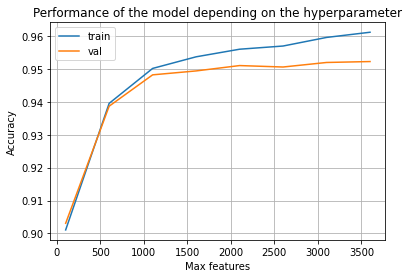

In [21]:
plt.plot(max_feature_sizes, scores_train, label="train")
plt.plot(max_feature_sizes, scores_val, label="val")
plt.title("Performance of the model depending on the hyperparameter")
plt.xlabel("Max features")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()